### 0. Importing the libraries
- requirement.txt 
    - yellowbrick library for visualisation
    - plotly for interactive visualisation

### 1. Plan:

- ### Reflect on the business logic of the app: 

    - What properties of a song influence the runner performance best? (reflect on his mood/motivation?)

        - Tempo
        
        - Energy
            - 
        - Danceability
    
        - Valence
            
    - Exploring external examples: Papers and Web Content
    
    - playlist of songs for running: 

#### What Spotify thinks is music for running: 

    Constructing two datasets and draw insights comparing : 
        
    #### 1. 1000 most popular tracks for 2023 
    #### 2. 10 playlists by Spotify for running

- #### Possible first development: 
- Sorting your running playlist according the pace predifined by your Garmin Coach feature (10k run training for example) 
- how this pace distribution looks like and how is mapped to the 5 groups in our spotify playlist


### 2. Importing the dataset / Data Acquisition

- Spotify API 
- save the data in a csv files for convenience 

### 3. Getting familiar with the dataset

- EDAs

- Relationships between features

- Comparing the features of the songs in a popular sport playlist and random popular songs
in order to gain insights on the features to seek for  
    -  plotting a feature portrait (taking the mean values of each set)

### 4. First Analysis of possible features to use and explore

### 5. Data Cleaning, Feature Extraction and Feature Engineering

### 6. Cluster analysis for similar songs based on audio features important for the business logic of the app

 - Domain transfer : project for recommendation system
 - Conclusion * 4 cluster were chosen as this captured the different labels in the best way despite
having a little higher silhouette score for k=2.

 ### Best silhouette score: 
    - Let's try other clustgering methods (k-mediods & agglomaritive clustering).
    - Cluster coverage: 
    

## 0. Importing the libraries

In [1]:
%matplotlib inline

from yellowbrick.features import Rank2D

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import os
import numpy as np
import pandas as pd

import seaborn as sns

import plotly.express as px 
import plotly.graph_objects as go
import plotly.offline as pyo

import matplotlib.pyplot as plt
import matplotlib

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## 1. Plan:

Brief description of the song features of importance for the business logic of the app:

- **Danceability** - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity.

- **Energy** - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
 Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

- **Key** - The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
- **Loudness** - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
- **Mode** - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- **Speechiness** - Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry)
- **Acousticness** - The higher the value the higher confidence that the track is acoustic.
- **Instrumentalness** - Predicts whether a track contains no vocals.. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". 
- **Liveness** - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- **Valence** - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- **Tempo** - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- **Time Signature** - The time signature of the song.
- **id** - The Spotify ID for the song.

#### **For dropping** : Reason: Focusing on features most related to the overall mood and energy of the song
- uri
- track_href
- analysis_url
- duration_ms

## 2. Importing the dataset / Data Acquisition
- connecting to Spotify API and fetching the desired data
https://developer.spotify.com/dashboard/
- search :
https://developer.spotify.com/documentation/web-api/reference/search

Setting the API credentials

In [2]:
client_credentials_manager = SpotifyClientCredentials(
    client_id="7a82212ac83f4af4b52afa56ebfdb290", client_secret="d53e35d10f084dca8da8ca5e7136e573"
)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

Ways to navigate through the complex JSON structures:
- pd.json_normalize()
    - path has to be specified in order to go through the nested json file 
- pretty print with json.dumps()
    - json.dumps() converts a Python object into a json string
    

In [3]:
# test playlist id: 37i9dQZF1DXcBWIGoYBM5M


In [4]:
playlist = sp.playlist("37i9dQZF1DXcBWIGoYBM5M")
df_product = pd.json_normalize(playlist["tracks"]["items"])


In [5]:
import json

print(json.dumps(playlist, indent=4))  # json.dumps() method converts a Python object into a json string

{
    "collaborative": false,
    "description": "Selena Gomez is on top of the Hottest 50!",
    "external_urls": {
        "spotify": "https://open.spotify.com/playlist/37i9dQZF1DXcBWIGoYBM5M"
    },
    "followers": {
        "href": null,
        "total": 34215937
    },
    "href": "https://api.spotify.com/v1/playlists/37i9dQZF1DXcBWIGoYBM5M?additional_types=track",
    "id": "37i9dQZF1DXcBWIGoYBM5M",
    "images": [
        {
            "height": null,
            "url": "https://i.scdn.co/image/ab67706f0000000361b43bc8c113ab93d6466509",
            "width": null
        }
    ],
    "name": "Today's Top Hits ",
    "owner": {
        "display_name": "Spotify",
        "external_urls": {
            "spotify": "https://open.spotify.com/user/spotify"
        },
        "href": "https://api.spotify.com/v1/users/spotify",
        "id": "spotify",
        "type": "user",
        "uri": "spotify:user:spotify"
    },
    "primary_color": "#FFFFFF",
    "public": true,
    "snapshot_id

#### 10 Spotify Playlists considered to be for running 

### !!! Can be skipped to the next section where tha data is loaded through the csv files
in order to not wait for fetching the data from the API

In [6]:
playlists_ids = [
    "37i9dQZF1EIdThJL1CyWNZ",
    "0JTaSx9jkW1saMOc6t0vIk",
    "37i9dQZF1DX0hWmn8d5pRe",
    "37i9dQZF1DWZUTt0fNaCPB",
    "0VSg3Ize1XJArEzV6fCVW5",
    "37i9dQZF1DX4Y1uAfxGdKJ",
    "37i9dQZF1EIfClyn4w4z31",
    "37i9dQZF1DX3PIAZMcbo2T",
    "37i9dQZF1DX4osfY3zybD2",
    "37i9dQZF1DWZq91oLsHZvy",
]

In [7]:
artist_name = []
track_name = []
track_popularity = []
artist_id = []
track_id = []

for playlist in playlists_ids:
    track_results = sp.playlist(playlist)

    for i, t in enumerate(track_results["tracks"]["items"]):
        artist_name.append(t["track"]["artists"][0]["name"])
        artist_id.append(t["track"]["artists"][0]["id"])
        track_name.append(t["track"]["name"])
        track_id.append(t["track"]["id"])
        track_popularity.append(t["track"]["popularity"])

Creating a dataframe from lists as columns

In [8]:
playlist_df = pd.DataFrame(
    {
        "artist_name": artist_name,
        "track_name": track_name,
        "track_id": track_id,
        "track_popularity": track_popularity,
        "artist_id": artist_id,
    }
)
print(playlist_df.shape)
playlist_df.head(10)

(745, 5)


,artist_name,track_name,track_id,track_popularity,artist_id
0,Britney Spears,Work Bitch,3KliPMvk1EvFZu9cvkj8p1,71,26dSoYclwsYLMAKD3tpOr4
1,Dua Lipa,Physical,3AzjcOeAmA57TIOr9zF1ZW,77,6M2wZ9GZgrQXHCFfjv46we
2,The Weeknd,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,92,1Xyo4u8uXC1ZmMpatF05PJ
3,Avicii,Wake Me Up,0nrRP2bk19rLc0orkWPQk2,88,1vCWHaC5f2uS3yhpwWbIA6
4,Kanye West,POWER,2gZUPNdnz5Y45eiGxpHGSc,80,5K4W6rqBFWDnAN6FQUkS6x
5,DNCE,Cake By The Ocean,76hfruVvmfQbw0eYn1nmeC,84,6T5tfhQCknKG4UnH90qGnz
6,Lucy Spraggan,Run,6izndsBZvyN6goqhfePz1e,51,3QLPy7F0m9XgChp2Lk9B3N
7,Jax Jones,You Don't Know Me (feat. RAYE),4DJORZgsbqnEJ4f4B9TBGV,68,4Q6nIcaBED8qUel8bBx6Cr
8,Survivor,Eye of the Tiger,2HHtWyy5CgaQbC7XSoOb0e,78,26bcq2nyj5GB7uRr558iQg
9,Taylor Swift,Shake It Off,0cqRj7pUJDkTCEsJkx8snD,87,06HL4z0CvFAxyc27GXpf02


Fetching the audio features for each song in the playlist

In [9]:
track_features = []

for track_id in playlist_df["track_id"]:
    features = sp.audio_features(track_id)
    track_features.append(features)

In [10]:
track_features[0][0].keys()


dict_keys(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])

In [62]:
playlist_track_features_df = pd.DataFrame(
    columns=[
        "danceability",
        "energy",
        "key",
        "loudness",
        "mode",
        "speechiness",
        "acousticness",
        "instrumentalness",
        "liveness",
        "valence",
        "tempo",
        "type",
        "id",
        "uri",
        "track_href",
        "analysis_url",
        "duration_ms",
        "time_signature",
    ]
)

for item in track_features:
    for feat in item:
        playlist_track_features_df = playlist_track_features_df.append(feat, ignore_index=True)

playlist_track_features_df.head()

C:\Users\dimit\AppData\Local\Temp\ipykernel_10572\3020435201.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dimit\AppData\Local\Temp\ipykernel_10572\3020435201.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dimit\AppData\Local\Temp\ipykernel_10572\3020435201.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dimit\AppData\Local\Temp\ipykernel_10572\3020435201.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dimit\AppData\Local\Temp\ipykernel_10572\3020435201.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.847,0.6220,1,-6.747,0,0.0903,0.119,0,0.285,0.220,130.001,audio_features,4rXLjWdF2ZZpXCVTfWcshS,spotify:track:4rXLjWdF2ZZpXCVTfWcshS,https://api.spotify.com/v1/tracks/4rXLjWdF2ZZp...,https://api.spotify.com/v1/audio-analysis/4rXL...,125040,4
1,0.511,0.5320,5,-5.745,1,0.0560,0.169,0,0.311,0.322,137.827,audio_features,3k79jB4aGmMDUQzEwa46Rz,spotify:track:3k79jB4aGmMDUQzEwa46Rz,https://api.spotify.com/v1/tracks/3k79jB4aGmMD...,https://api.spotify.com/v1/audio-analysis/3k79...,219724,4
2,0.557,0.7740,7,-5.275,0,0.3510,0.012,0,0.396,0.397,111.975,audio_features,67nepsnrcZkowTxMWigSbb,spotify:track:67nepsnrcZkowTxMWigSbb,https://api.spotify.com/v1/tracks/67nepsnrcZko...,https://api.spotify.com/v1/audio-analysis/67ne...,246134,4
3,0.444,0.0911,0,-17.665,1,0.0307,0.959,0.000001,0.098,0.142,78.403,audio_features,6wf7Yu7cxBSPrRlWeSeK0Q,spotify:track:6wf7Yu7cxBSPrRlWeSeK0Q,https://api.spotify.com/v1/tracks/6wf7Yu7cxBSP...,https://api.spotify.com/v1/audio-analysis/6wf7...,222370,4
4,0.712,0.6030,8,-5.520,1,0.0262,0.186,0,0.115,0.670,97.994,audio_features,1Lo0QY9cvc8sUB2vnIOxDT,spotify:track:1Lo0QY9cvc8sUB2vnIOxDT,https://api.spotify.com/v1/tracks/1Lo0QY9cvc8s...,https://api.spotify.com/v1/audio-analysis/1Lo0...,265493,4


In [63]:
playlist_track_features_df.shape


(1000, 18)

#### 1000 most popular tracks for 2023 

In [13]:
artist_name = []
track_name = []
track_popularity = []
artist_id = []
track_id = []
for i in range(0, 1000, 50):
    track_results = sp.search(q="year:2023", type="track", limit=50, offset=i)

    for i, t in enumerate(track_results["tracks"]["items"]):
        artist_name.append(t["artists"][0]["name"])
        artist_id.append(t["artists"][0]["id"])
        track_name.append(t["name"])
        track_id.append(t["id"])
        track_popularity.append(t["popularity"])

Creating a dataframe with the data

In [14]:
popular_tracks_df = pd.DataFrame(
    {
        "artist_name": artist_name,
        "track_name": track_name,
        "track_id": track_id,
        "track_popularity": track_popularity,
        "artist_id": artist_id,
    }
)
print(popular_tracks_df.shape)
popular_tracks_df.head(10)

(1000, 5)


,artist_name,track_name,track_id,track_popularity,artist_id
0,Gunna,fukumean,4rXLjWdF2ZZpXCVTfWcshS,96,2hlmm7s2ICUX0LVIhVFlZQ
1,Olivia Rodrigo,vampire,3k79jB4aGmMDUQzEwa46Rz,97,1McMsnEElThX1knmY4oliG
2,Travis Scott,MELTDOWN (feat. Drake),67nepsnrcZkowTxMWigSbb,94,0Y5tJX1MQlPlqiwlOH1tJY
3,Billie Eilish,What Was I Made For? [From The Motion Picture ...,6wf7Yu7cxBSPrRlWeSeK0Q,98,6qqNVTkY8uBg9cP3Jd7DAH
4,Luke Combs,Fast Car,1Lo0QY9cvc8sUB2vnIOxDT,91,718COspgdWOnwOFpJHRZHS
5,Nicki Minaj,Barbie World (with Aqua) [From Barbie The Album],741UUVE2kuITl0c6zuqqbO,95,0hCNtLu0JehylgoiP8L4Gh
6,Travis Scott,FE!N (feat. Playboi Carti),42VsgItocQwOQC3XWZ8JNA,94,0Y5tJX1MQlPlqiwlOH1tJY
7,Travis Scott,I KNOW ?,6wsqVwoiVH2kde4k4KKAFU,93,0Y5tJX1MQlPlqiwlOH1tJY
8,Doja Cat,Paint The Town Red,2IGMVunIBsBLtEQyoI1Mu7,94,5cj0lLjcoR7YOSnhnX0Po5
9,Dua Lipa,Dance The Night (From Barbie The Album),1vYXt7VSjH9JIM5oRRo7vA,97,6M2wZ9GZgrQXHCFfjv46we


Fetching the audio features for each song in popular tracks df

In [15]:
track_features = []

for track_id in popular_tracks_df["track_id"]:
    features = sp.audio_features(track_id)
    track_features.append(features)

In [16]:
popular_track_features_df = pd.DataFrame(
    columns=[
        "danceability",
        "energy",
        "key",
        "loudness",
        "mode",
        "speechiness",
        "acousticness",
        "instrumentalness",
        "liveness",
        "valence",
        "tempo",
        "type",
        "id",
        "uri",
        "track_href",
        "analysis_url",
        "duration_ms",
        "time_signature",
    ]
)

for item in track_features:
    for feat in item:
        popular_track_features_df = popular_track_features_df.append(feat, ignore_index=True)

popular_track_features_df.head()

C:\Users\dimit\AppData\Local\Temp\ipykernel_10572\1463903099.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dimit\AppData\Local\Temp\ipykernel_10572\1463903099.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dimit\AppData\Local\Temp\ipykernel_10572\1463903099.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dimit\AppData\Local\Temp\ipykernel_10572\1463903099.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dimit\AppData\Local\Temp\ipykernel_10572\1463903099.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.847,0.6220,1,-6.747,0,0.0903,0.119,0,0.285,0.220,130.001,audio_features,4rXLjWdF2ZZpXCVTfWcshS,spotify:track:4rXLjWdF2ZZpXCVTfWcshS,https://api.spotify.com/v1/tracks/4rXLjWdF2ZZp...,https://api.spotify.com/v1/audio-analysis/4rXL...,125040,4
1,0.511,0.5320,5,-5.745,1,0.0560,0.169,0,0.311,0.322,137.827,audio_features,3k79jB4aGmMDUQzEwa46Rz,spotify:track:3k79jB4aGmMDUQzEwa46Rz,https://api.spotify.com/v1/tracks/3k79jB4aGmMD...,https://api.spotify.com/v1/audio-analysis/3k79...,219724,4
2,0.557,0.7740,7,-5.275,0,0.3510,0.012,0,0.396,0.397,111.975,audio_features,67nepsnrcZkowTxMWigSbb,spotify:track:67nepsnrcZkowTxMWigSbb,https://api.spotify.com/v1/tracks/67nepsnrcZko...,https://api.spotify.com/v1/audio-analysis/67ne...,246134,4
3,0.444,0.0911,0,-17.665,1,0.0307,0.959,0.000001,0.098,0.142,78.403,audio_features,6wf7Yu7cxBSPrRlWeSeK0Q,spotify:track:6wf7Yu7cxBSPrRlWeSeK0Q,https://api.spotify.com/v1/tracks/6wf7Yu7cxBSP...,https://api.spotify.com/v1/audio-analysis/6wf7...,222370,4
4,0.712,0.6030,8,-5.520,1,0.0262,0.186,0,0.115,0.670,97.994,audio_features,1Lo0QY9cvc8sUB2vnIOxDT,spotify:track:1Lo0QY9cvc8sUB2vnIOxDT,https://api.spotify.com/v1/tracks/1Lo0QY9cvc8s...,https://api.spotify.com/v1/audio-analysis/1Lo0...,265493,4


In [17]:
popular_track_features_df.shape


(1000, 18)

### Exporting both dataframes to csv files for convenience

In [18]:
# export to csv
playlist_df.to_csv("data/playlists.csv", index=False)
popular_tracks_df.to_csv("data/popular_tracks.csv", index=False)
playlist_track_features_df.to_csv("data/playlist_track_features.csv", index=False)
popular_track_features_df.to_csv("data/popular_track_features.csv", index=False)

Loading the datesets from the csv files in order to save time and not fetch the data from the API each time

In [19]:
playlist_df = pd.read_csv("data/playlists.csv")
popular_tracks_df = pd.read_csv("data/popular_tracks.csv")
playlist_track_features_df = pd.read_csv("data/playlist_track_features.csv")
popular_track_features_df = pd.read_csv("data/popular_track_features.csv")

### We are keeping playlist_df and popular_tracks_df as the key dataframes for retrieving the track and artist names
- We will focus on the audio features for the following analysis

## 3. Getting familiar with the dataset

In [20]:
playlist_track_features_df.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
id                   object
uri                  object
track_href           object
analysis_url         object
duration_ms           int64
time_signature        int64
dtype: object

Let's drop some columns that do not contribute to the analysis
- uri, track_href, analysis_url, duration_ms
- "type" doesn't give us any information either

In [21]:
playlist_track_features_df["mode"].unique()
playlist_track_features_df.tempo.unique()
playlist_track_features_df.type.unique()

array(['audio_features'], dtype=object)

In [22]:
playlist_track_features_clean = playlist_track_features_df.drop(
    ["type", "uri", "track_href", "analysis_url", "duration_ms"], axis=1
)

In [23]:
playlist_track_features_clean


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,time_signature
0,0.629,0.824,9,-6.530,1,0.1590,0.155000,0.000628,0.0651,0.852,128.010,3KliPMvk1EvFZu9cvkj8p1,4
1,0.647,0.844,0,-3.756,1,0.0457,0.013700,0.000658,0.1020,0.746,146.967,3AzjcOeAmA57TIOr9zF1ZW,4
2,0.514,0.730,1,-5.934,1,0.0598,0.001460,0.000095,0.0897,0.334,171.005,0VjIjW4GlUZAMYd2vXMi3b,4
3,0.532,0.783,2,-5.697,1,0.0523,0.003800,0.001200,0.1610,0.643,124.080,0nrRP2bk19rLc0orkWPQk2,4
4,0.542,0.914,0,-4.747,0,0.1130,0.016100,0.000000,0.7440,0.576,153.993,2gZUPNdnz5Y45eiGxpHGSc,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
738,0.753,0.678,3,-7.065,1,0.0527,0.073500,0.000082,0.6120,0.364,124.000,1YzIe5I0UNPgPRPxYpe92f,4
739,0.482,0.883,8,-7.020,0,0.0324,0.000847,0.821000,0.3660,0.951,164.942,3Kh2n3zlDSGUVlDM2sjkts,4
740,0.560,0.724,9,-6.590,1,0.0274,0.000425,0.495000,0.1210,0.386,127.016,3Xd0819paqFQB4LBA8XVb0,4
741,0.531,0.719,1,-5.063,1,0.0296,0.631000,0.922000,0.1300,0.179,75.001,1tgLMyNVmgtLJcOfE0wbyJ,4


Let's do the same for the popular tracks df

In [24]:
popular_track_features_clean = popular_track_features_df.drop(
    ["type", "uri", "track_href", "analysis_url", "duration_ms"], axis=1
)

In [25]:
popular_track_features_clean


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,time_signature
0,0.847,0.6220,1,-6.747,0,0.0903,0.119000,0.000000,0.285,0.220,130.001,4rXLjWdF2ZZpXCVTfWcshS,4
1,0.511,0.5320,5,-5.745,1,0.0560,0.169000,0.000000,0.311,0.322,137.827,3k79jB4aGmMDUQzEwa46Rz,4
2,0.557,0.7740,7,-5.275,0,0.3510,0.012000,0.000000,0.396,0.397,111.975,67nepsnrcZkowTxMWigSbb,4
3,0.444,0.0911,0,-17.665,1,0.0307,0.959000,0.000001,0.098,0.142,78.403,6wf7Yu7cxBSPrRlWeSeK0Q,4
4,0.712,0.6030,8,-5.520,1,0.0262,0.186000,0.000000,0.115,0.670,97.994,1Lo0QY9cvc8sUB2vnIOxDT,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.472,0.7490,9,-6.316,0,0.2500,0.427000,0.000619,0.131,0.509,192.129,4WOzoYJm0P5oT2Gwso6pSx,3
996,0.889,0.6050,8,-5.896,1,0.0381,0.582000,0.000003,0.268,0.902,124.967,7nDgUvJLsinxKYyQhv3tAK,4
997,0.473,0.7510,8,-5.196,1,0.0318,0.000099,0.018100,0.118,0.569,110.025,0unNLQbn2xlm2nPcB1pdjS,4
998,0.822,0.8430,1,-4.308,1,0.0407,0.006990,0.000001,0.260,0.631,136.004,1OaAlsbTJugFODycEgIDUj,4


### Epxloring the running playlists data 

- Freature Correlation with **yellowbrick**

    - **Yellowbrick** is a suite of visual diagnostic tools called “Visualizers” that extend the Scikit-Learn API to allow human steering of the model selection process.
    In a nutshell, Yellowbrick combines scikit-learn with matplotlib in the best tradition of the scikit-learn documentation, but to produce visualizations for your models!
- 
- Tempo as the most common perception for the song's ability to motivate the runner

### Correlation between variables


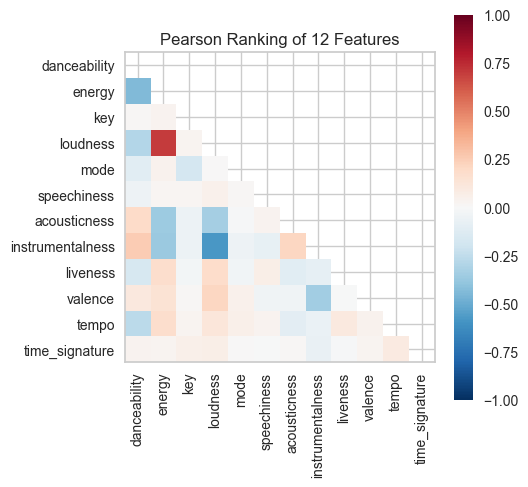

<Axes: title={'center': 'Pearson Ranking of 12 Features'}>

In [26]:
corr_datset = playlist_track_features_clean.drop(["id"], axis=1)

visualizer = Rank2D(algorithm="pearson")
plt.rcParams["figure.figsize"] = (5, 5)
visualizer.fit_transform(corr_datset)
visualizer.show()

- From Correlation chart we can see that loudness and energy are highly correlated with each other.
 Let's explore further the relationship between them:
    - the following plot shows scatter plot and univariate distribution histograms of loudness and energy

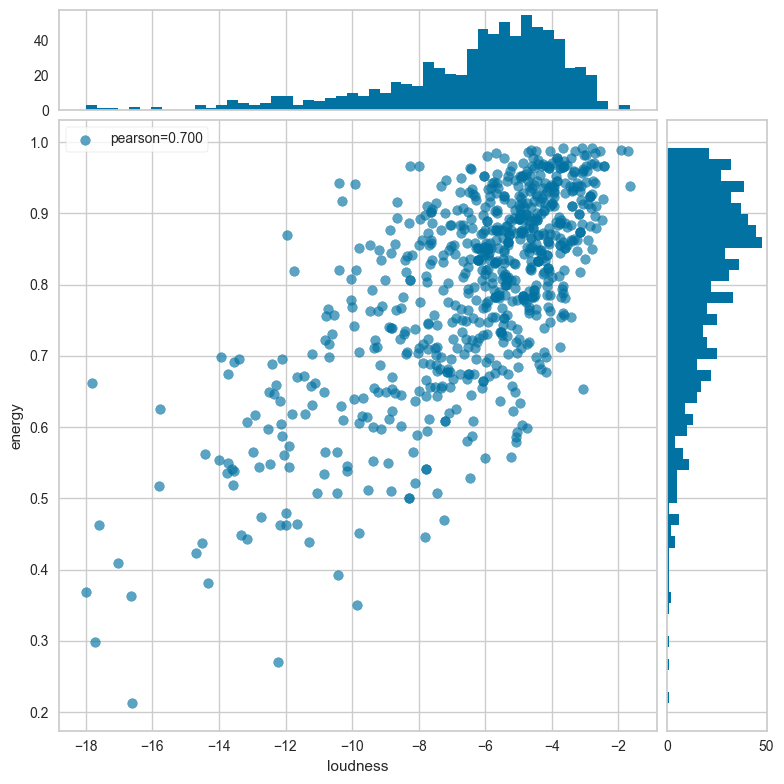

<Axes: xlabel='loudness', ylabel='energy'>

In [27]:
from yellowbrick.features import JointPlotVisualizer

plt.rcParams["figure.figsize"] = (8, 8)
ax1 = plt.gca()
visualizer = JointPlotVisualizer(columns=["loudness", "energy"], ax=ax1)
# ax1.semilogx() ?
visualizer.fit_transform(playlist_track_features_clean)
visualizer.show()

#### Bivarate KDE

- Kernel Density Estimate plots are useful for looking at univariate relations. Helping understanding the joint distribution.
- It is particularly useful for visualizing the relationship between two continuous variables when scatter plots might be too cluttered.
- The contour levels can give a sense of the density of the data points

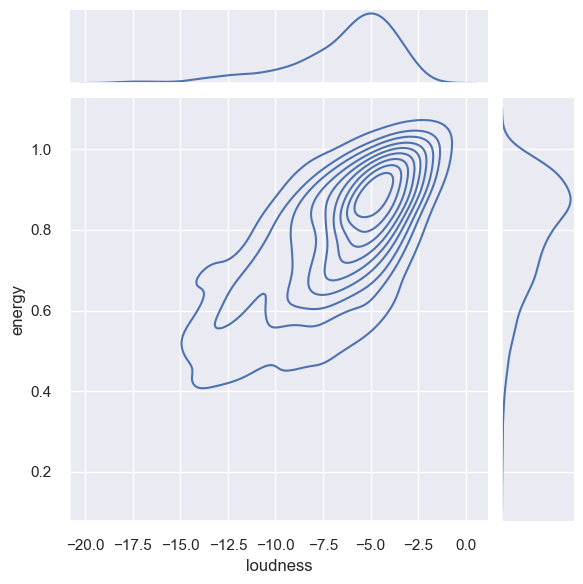

In [28]:
sns.set(rc={"figure.figsize": (10, 10)})
sns.jointplot(data=playlist_track_features_clean, x="loudness", y="energy", kind="kde")

In [29]:
playlist_track_features_clean.columns


Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'id', 'time_signature'],
      dtype='object')

### Let's look at the tempo feature which by at first glance seems to be the most important feature for a good running song that gives you motivation

C:\Users\dimit\AppData\Local\Temp\ipykernel_10572\586133535.py:17: UserWarning:

FixedFormatter should only be used together with FixedLocator



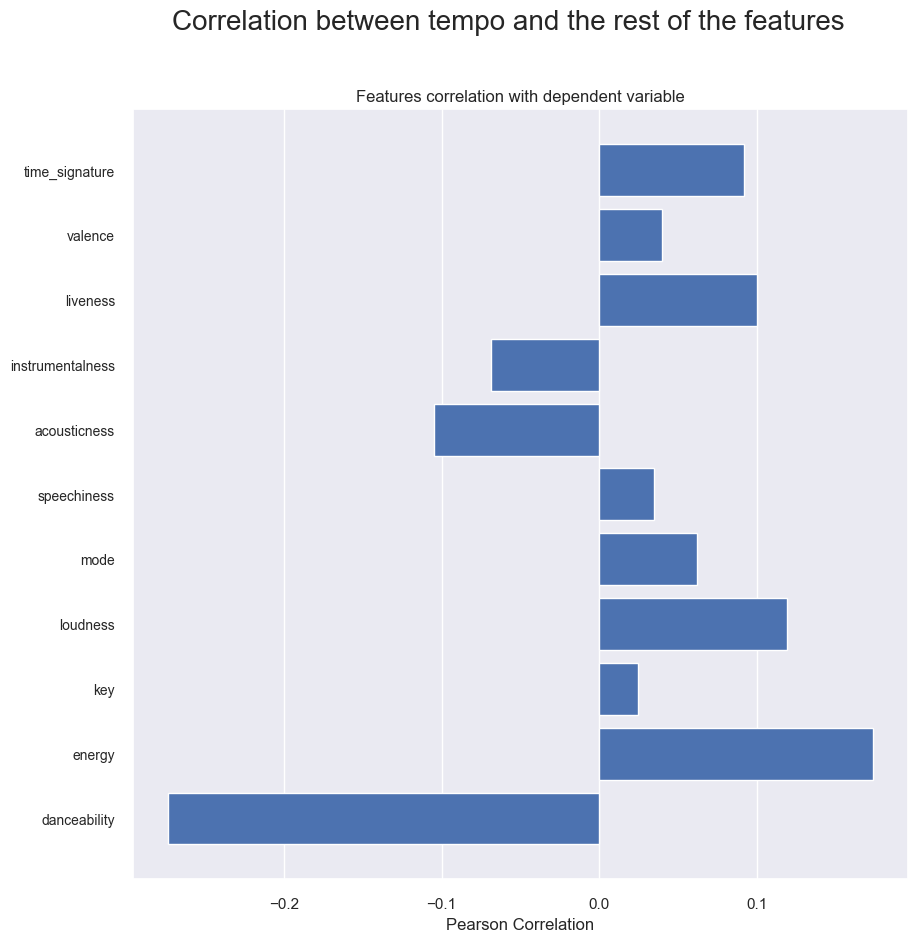

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [30]:
### FIXME: This is from the REcoomendation. Extract similar insight with the new data

from yellowbrick.target import FeatureCorrelation

data = playlist_track_features_clean

feature_names = [
    "danceability",
    "energy",
    "key",
    "loudness",
    "mode",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "time_signature",
]

X, y = data[feature_names], data["tempo"]

# Create a list of the feature names
features = np.array(feature_names)

# set up some plot styling preferences
ax = plt.gca()
ax.set_yticklabels(feature_names, rotation=0, fontsize=10)
plt.suptitle("Correlation between tempo and the rest of the features", fontsize=20)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features, method="pearson", ax=ax)

plt.rcParams["figure.figsize"] = (10, 10)
visualizer.fit(X, y)  # Fit the data to the visualizer
visualizer.show()

#### Tempo seems to be not so correlated with the other features except negative correlation with danceability which is expected


### Optimizing the dataframes:

- columns are the same for both dataframes
- in order not to execute all manipulation and operations on the features two times: 

    - Lets combining the two dataframes into one with a new flag column for the source of the data (popular tracks or running playlist) - columns "is running" with values 0 and 1 ( Yes and No)
- 
- When refactoring the code this step will be move in the data acquisition step before cleaning the data

In [31]:
playlist_track_features_clean["is_running"] = 1
popular_track_features_clean["is_running"] = 0


In [32]:
playlist_df["is_running"] = 1
popular_tracks_df["is_running"] = 0


In [33]:
track_features_clean = pd.concat([playlist_track_features_clean, popular_track_features_clean], axis=0).reset_index(
    drop=True
)

In [34]:
tracks_combined = pd.concat([playlist_df, popular_tracks_df], axis=0).reset_index(
    drop=True
)


In [35]:
tracks_combined


,artist_name,track_name,track_id,track_popularity,artist_id,is_running
0,Britney Spears,Work Bitch,3KliPMvk1EvFZu9cvkj8p1,71,26dSoYclwsYLMAKD3tpOr4,1
1,Dua Lipa,Physical,3AzjcOeAmA57TIOr9zF1ZW,77,6M2wZ9GZgrQXHCFfjv46we,1
2,The Weeknd,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,92,1Xyo4u8uXC1ZmMpatF05PJ,1
3,Avicii,Wake Me Up,0nrRP2bk19rLc0orkWPQk2,88,1vCWHaC5f2uS3yhpwWbIA6,1
4,Kanye West,POWER,2gZUPNdnz5Y45eiGxpHGSc,80,5K4W6rqBFWDnAN6FQUkS6x,1
...,...,...,...,...,...,...
1740,Quavo,Galaxy,4WOzoYJm0P5oT2Gwso6pSx,68,0VRj0yCOv2FXJNP47XQnx5,0
1741,Panter Bélico,Símbolo Sexual,7nDgUvJLsinxKYyQhv3tAK,80,7pESOE4dEq8Yk4OKlJa3pS,0
1742,Nate Smith,Whiskey On You,0unNLQbn2xlm2nPcB1pdjS,70,4NYMUsIcUUsBHbV9DICa5x,0
1743,Mike WiLL Made-It,Blood Moon (feat. Lil Uzi Vert),1OaAlsbTJugFODycEgIDUj,72,0NWbwDZY1VkRqFafuQm6wk,0


### Analyzing the song genre 

Let's try to add genre to every song in the dataframes
- it is on artist level so we will have to fetch the genre for each artist and then add it to the datest
- it will be added as step in the data acquisition process when refractoring the code

2 ways of approaching doing the mapping
- filling up a dictionary with artist_id as key and genre as value
- filling up a list with list genre than zipping into dictionary with artist_id as key and genre as value  

In [36]:
if os.path.exists("data/tracks_combined.csv"):
    # Load the CSV file
    tracks_combined = pd.read_csv("data/tracks_combined.csv")
else:
    artist_genres_dict = {}
    artist_ids = tracks_combined.artist_id.unique()

    for artist_id in artist_ids:
        artist = sp.artist(artist_id)
        artist_genres_dict.update({artist_id: artist["genres"]})

    tracks_combined["genre"] = tracks_combined["artist_id"].map(artist_genres_dict)

In [37]:
artist_genres_list = []
artist_ids = tracks_combined.artist_id.unique()

for artist_id in artist_ids:
    artist = sp.artist(artist_id)
    artist_genres_list.append(artist["genres"])
    break

genres = dict(zip(artist_ids, artist_genres_list))

# tracks_combined["genre"] = tracks_combined["artist_id"].map(genres)

Hint: Flatteing the list of list with numpy

In [38]:
# flatten the list
flatten_list = np.concatenate(artist_genres_list)
len(set(flatten_list))
# 332 unique genres in the playlist


3

In [39]:
tracks_combined


,artist_name,track_name,track_id,track_popularity,artist_id,is_running,genre
0,Kanye West,Stronger,0j2T0R9dR9qdJYsB7ciXhf,84,5K4W6rqBFWDnAN6FQUkS6x,1,"['chicago rap', 'hip hop', 'rap']"
1,Elton John,Cold Heart - Claptone Remix,3ck2KxuP99yTwWzdf8piiC,64,3PhoLpVuITZKcymswpck5b,1,"['glam rock', 'mellow gold', 'piano rock', 'ro..."
2,Eminem,Lose Yourself,1v7L65Lzy0j0vdpRjJewt1,83,7dGJo4pcD2V6oG8kP0tJRR,1,"['detroit hip hop', 'hip hop', 'rap']"
3,Macklemore & Ryan Lewis,Can't Hold Us (feat. Ray Dalton),22skzmqfdWrjJylampe0kt,85,5BcAKTbp20cv7tC5VqPFoC,1,"['pop rap', 'seattle hip hop']"
4,Woodkid,Run Boy Run,0boS4e6uXwp3zAvz1mLxZS,73,44TGR1CzjKBxSHsSEy7bi9,1,['chamber pop']
...,...,...,...,...,...,...,...
1739,Billie Eilish,hostage,0M4MJGqG7itLpMMfmqbvIR,2,6qqNVTkY8uBg9cP3Jd7DAH,0,"['art pop', 'electropop', 'pop']"
1740,Sam Cooke,(What A) Wonderful World,7jVBSPLSbL1jKVBDMXlRCx,68,6hnWRPzGGKiapVX1UCdEAC,0,"['classic soul', 'soul', 'vocal jazz']"
1741,Grupo Clasificado,M.L.P,0oYk83uZu4S5ROlM8VZMGl,77,5ZGrM7y0Z6yF3s9dBjHWi9,0,"['corrido', 'corridos tumbados', 'sierreno']"
1742,BigXthaPlug,Whip It,3TmwzKk7dOnMka3Q7NvGht,68,6qxpnaukVayrQn6ViNvu9I,0,['southern hip hop']


## 5. Comparing the audio features of the songs in both groups in order to gain insights on the most important features to seek for running songs

#### Prominent differences would be a good indicator for what variables make a song suitable for running

Approaches:

- comparing the mean values of the features in both groups
- comparing the distribution of the features in both groups

- To determine the most prominent features differentiating running songs from popular songs, we can use machine learning models.
One common method is to use a tree-based algorithm (like **Random Forest**) and inspect feature importance.



In [40]:
playlist_track_features_clean.mean()


C:\Users\dimit\AppData\Local\Temp\ipykernel_10572\629106818.py:1: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



danceability          0.641945
energy                0.796398
key                   5.475101
loudness             -6.357572
mode                  0.551817
speechiness           0.066948
acousticness          0.088829
instrumentalness      0.170909
liveness              0.182476
valence               0.540979
tempo               126.494600
time_signature        3.985195
is_running            1.000000
dtype: float64

All features that are not between 0 and 1 have to be normalized 
 - features that are not between 0 and 1: 
    
    - loudness
    - tempo
    

    - we will use MinMaxScaler from sklearn.preprocessing 


In [41]:
track_features_clean.to_csv("data/track_features_clean.csv", index=False)

Features that are categorical:
- key
- mode
- time_signature


In [42]:
features_for_scaling = [
    "danceability",
    "energy",
    "loudness",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
]

??? All numerical features except "loudness" and "tempo" are between 0 and 1. Is it necessary to scale the rest? 

In [43]:
# Features can be normalized with scikit-learn's minmaxscaler
# to be able to compare and catch prominent diffrences better in the groups.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(
    track_features_clean[features_for_scaling]
)  # fit_transform() is used to scale the data not only fit().
features_scaled

array([[0.60324826, 0.82285955, 0.67966544, ..., 0.05258075, 0.8656369 ,
        0.47043467],
       [0.62412993, 0.8439477 , 0.82744659, ..., 0.09217727, 0.75349132,
        0.59572134],
       [0.46983759, 0.72374526, 0.71141655, ..., 0.07897843, 0.31760474,
        0.75458829],
       ...,
       [0.42227378, 0.74588781, 0.75073251, ..., 0.1093465 , 0.56622937,
        0.35157195],
       [0.82714617, 0.84289329, 0.79803953, ..., 0.26172336, 0.63182395,
        0.52326696],
       [0.94083527, 0.6731337 , 0.77076341, ..., 0.10290804, 0.70165044,
        0.55014573]])

In [44]:
features_scaled_df = pd.DataFrame(
    features_scaled, columns=track_features_clean[features_for_scaling].columns
)


In [45]:
features_scaled_df


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.603248,0.822860,0.679665,0.174632,0.157357,0.000638,0.052581,0.865637,0.470435
1,0.624130,0.843948,0.827447,0.028287,0.013905,0.000668,0.092177,0.753491,0.595721
2,0.469838,0.723745,0.711417,0.046500,0.001478,0.000097,0.078978,0.317605,0.754588
3,0.490719,0.779629,0.724042,0.036812,0.003854,0.001218,0.155489,0.644520,0.444461
4,0.502320,0.917756,0.774652,0.115216,0.016341,0.000000,0.781092,0.573635,0.642156
...,...,...,...,...,...,...,...,...,...
1738,0.421114,0.743779,0.691066,0.292173,0.433500,0.000628,0.123296,0.502751,0.894197
1739,0.904872,0.591944,0.713441,0.018471,0.590861,0.000003,0.270308,0.918536,0.450324
1740,0.422274,0.745888,0.750733,0.010333,0.000097,0.018376,0.109346,0.566229,0.351572
1741,0.827146,0.842893,0.798040,0.021829,0.007093,0.000001,0.261723,0.631824,0.523267


In [46]:
features_scaled_df[track_features_clean.is_running == 1][features_for_scaling].mean()


danceability        0.618265
energy              0.793756
loudness            0.688851
speechiness         0.055732
acousticness        0.090178
instrumentalness    0.173512
liveness            0.178534
valence             0.536584
tempo               0.460419
dtype: float64

### Using pyplot to plot interactively the distribution of the features in both groups

In [47]:
fig = go.Figure(
    data=[
        go.Scatterpolar(
            r=features_scaled_df[track_features_clean.is_running == 1][features_for_scaling].mean(),
            theta=features_for_scaling,
            fill="toself",
            name="Running tracks",
        ),
        go.Scatterpolar(
            r=features_scaled_df[track_features_clean.is_running == 0][features_for_scaling].mean(),
            theta=features_for_scaling,
            fill="toself",
            name="Popular tracks",
        ),
    ],
    layout=go.Layout(
        title=go.layout.Title(text="Feature comparison"), polar={"radialaxis": {"visible": True}}, showlegend=True
    ),
)

# pyo.plot(fig)
fig.show()

It looks like the Running songs have more energy and instrumentalness and feature a little more valence. They also have a higher overall tempo but less danceability.

#### Tempo for both groups of songs should be compared in a more detailed way without normalizing


In [48]:
track_features_clean[track_features_clean.is_running == 1].tempo.mean(), track_features_clean[
    track_features_clean.is_running == 0
].tempo.mean()

(126.49460026917902, 124.15883699999999)

- values are very close 

## Let's now plot the distributions of the features for both groups of songs

- we will use plt.subplots() and sns.FacetGrid() to familiarize ourselves with tool is more convenient and better for the such tasks

- ### For visualizing the distributions themselves we will use sns.histplot() with statistic = "density" to show the density rather than the number of observations in each bin
- "density" is more appropriate for the continuous variables which in our case are all except "key", "mode" and "time_signature"
- for discrete variables we would have to use "probability"  as the statistic

In [67]:
track_features_clean.columns[:-2]


Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature'],
      dtype='object')

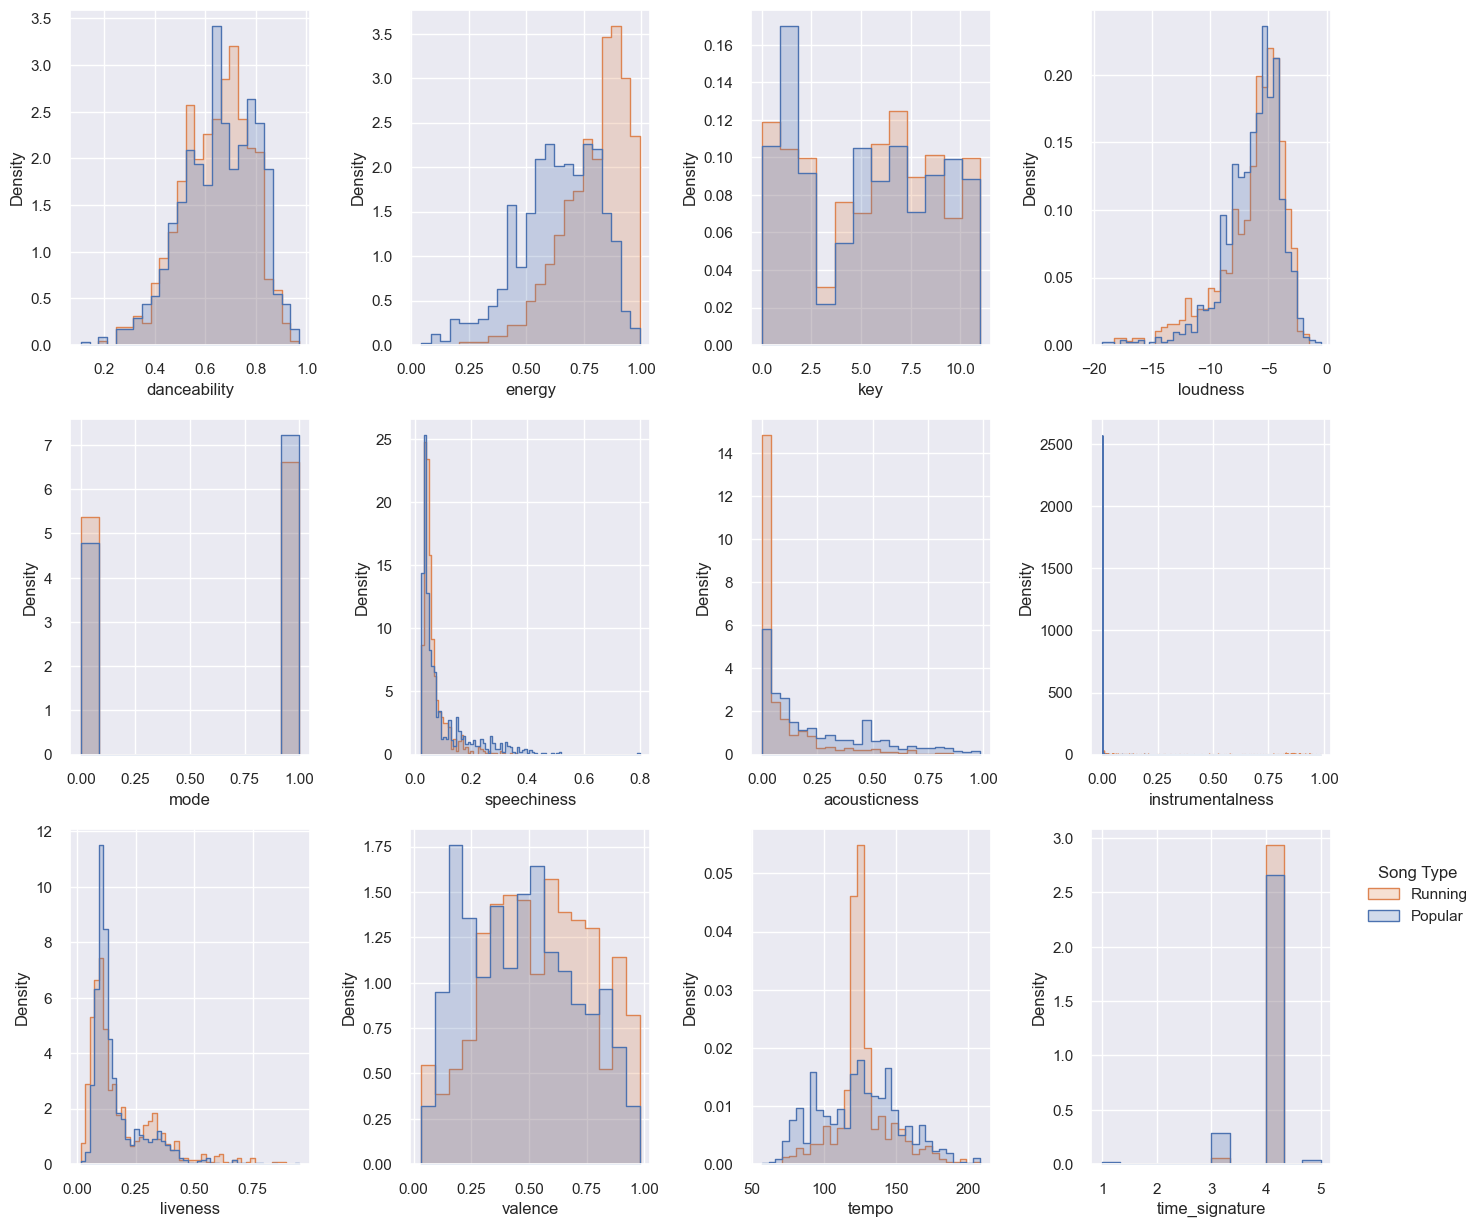

In [70]:
# Determine the number of rows and columns for the subplot grid
n_features = len(track_features_clean.columns) - 1  # excluding 'is_running'
n_cols = 4
n_rows = int(n_features / n_cols) + (n_features % n_cols > 0)

# Create a new figure with a specified size
plt.figure(figsize=(15, 4 * n_rows))

# Plot each feature in a subplot
for index, feature in enumerate(track_features_clean.columns[:-2], start=1):  # excluding 'is_running' column
    plt.subplot(n_rows, n_cols, index)
    sns.histplot(
        track_features_clean,
        x=feature,
        hue="is_running",
        element="step",
        stat="density",
        common_norm=False,
        legend=False,
    )
    # plt.title(f'{feature}')

plt.legend(title="Song Type", labels=["Running", "Popular"], loc=2, bbox_to_anchor=(1, 1), borderaxespad=2)
plt.tight_layout()
plt.show()

c:\Users\dimit\anaconda3\envs\Jupyter\lib\site-packages\seaborn\axisgrid.py:181: UserWarning:

You have mixed positional and keyword arguments, some input may be discarded.



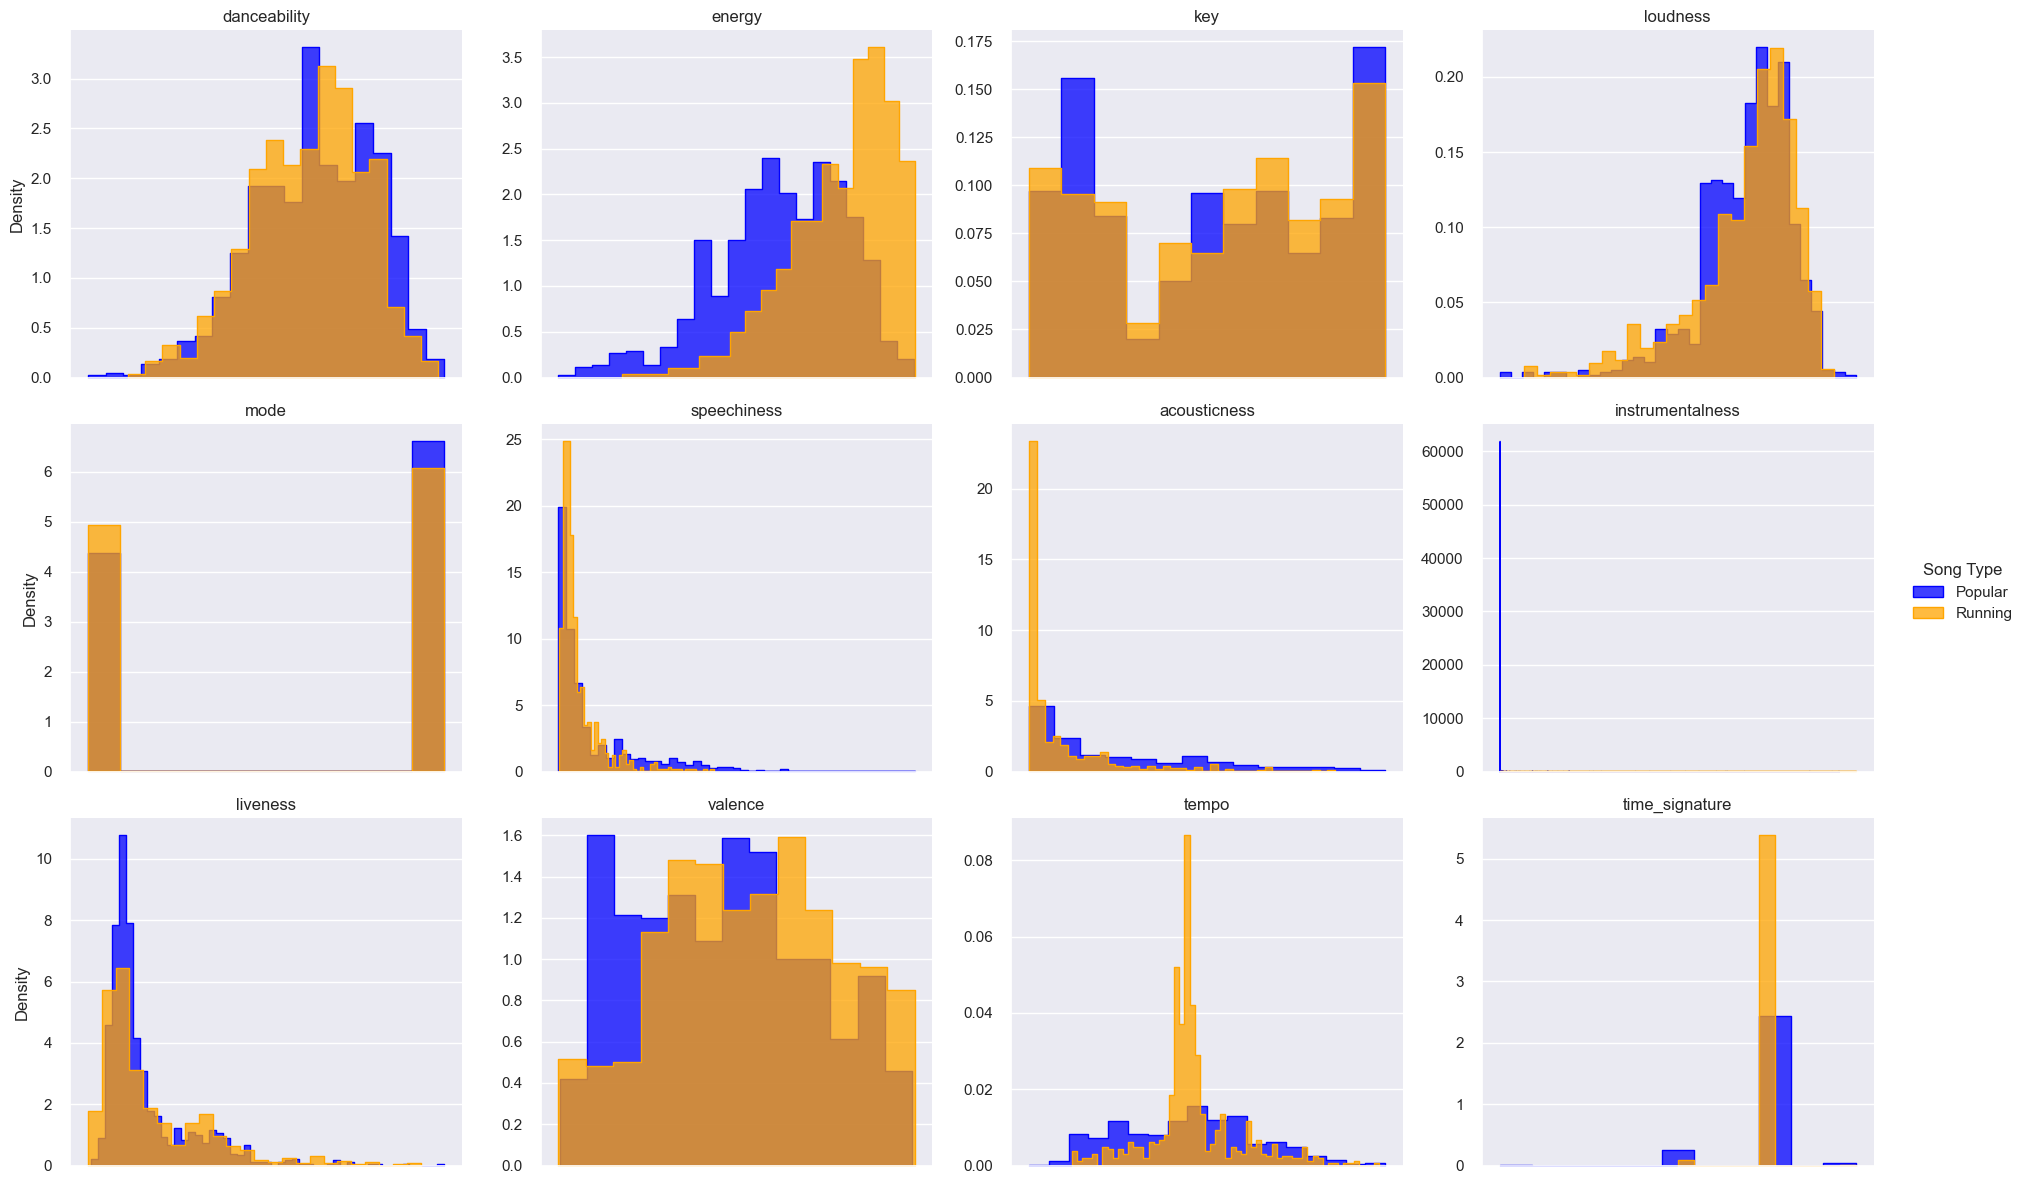

In [71]:
# Melt the dataframe for better plotting with FacetGrid
melted_df = track_features_clean.melt(id_vars="is_running", value_vars=track_features_clean.columns[:-2])

# Modify the FacetGrid mapping to exclude "binwidth" parameter for compatibility
g = sns.FacetGrid(
    melted_df,
    col="variable",
    col_wrap=4,
    sharex=False,
    sharey=False,
    hue="is_running",
    palette={0: "blue", 1: "orange"},
    height=4,
    aspect=1.2,
)

# Map histograms to the grid
g.map(sns.histplot, "value", element="step", stat="density", common_norm=False)

# Customize the plots
g.set_titles(col_template="{col_name}")
g.set_axis_labels("", "")
g.set_titles("{col_name}")
g.set(xticks=[])
g.set_ylabels("Density")
g.add_legend(title="Song Type", labels=["Popular", "Running"])
g.tight_layout()

plt.show()

### Conclusions: 

- One notable difference is the distribution of the tempo feature for both groups.
    - The Running songs have a substationally more high values arround the center of the distribution.

- Another insight that is more evident is the big difference in distributions of the energy feature. 
    - Although very skewed to left The Running songs have a greater proportion of high values.

####  DO IT: - Let's investigate further the tempo feature ( What proportion are the high values)
- box plot 

## 6. Random Forest Classifier for feature importance

### Feature importance provided by Random Forest Classifier can give us conclusions on the most important features in differentiating the two groups of songs

- Classifier is appropriate for the task because when we combined both datasets, we set a binary variable that can be used as the target variable - "is running" with values 0 and 1
- We are using bootstrapping to create multiple samples from the original dataset because it is a small dataset and we want to avoid overfitting as much as possible
- We are using the default number of trees in the forest - 100
- criterion for splitting is left "gini" - default value

- After fitting the model we can use the feature_importances_ attribute to get the feature importance scores, built a dataframe and plot the results

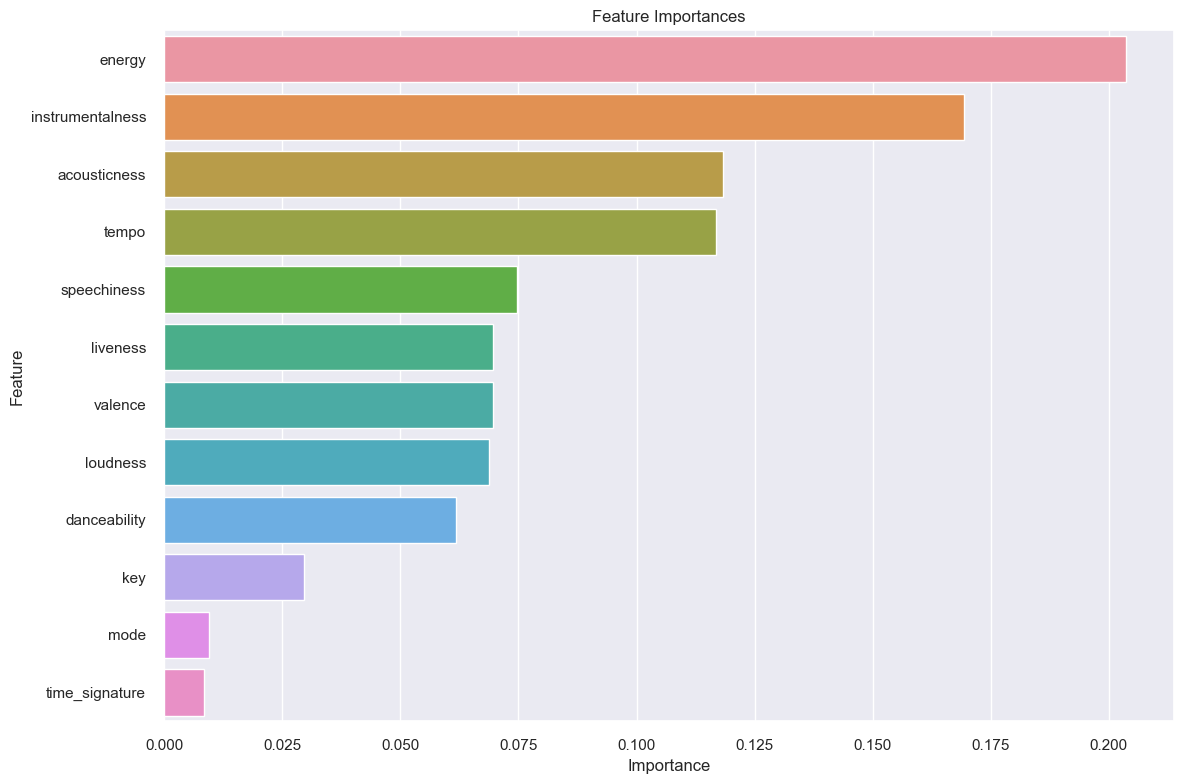

In [51]:
from sklearn.ensemble import RandomForestClassifier

track_features_clean = track_features_clean.drop(["id"], axis=1)

# Splitting data into features and target
X = track_features_clean.drop("is_running", axis=1)
y = track_features_clean["is_running"]

# Instantiate the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, criterion="gini", bootstrap=True, random_state=42)

# Fit the model
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to store features and their importances
features_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importances})

# Sort the DataFrame based on importances
features_df = features_df.sort_values(by="Importance", ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x="Importance", y="Feature", data=features_df)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()

plt.show()

In [52]:
track_features_clean


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,is_running
0,0.629,0.824,9,-6.530,1,0.1590,0.155000,0.000628,0.0651,0.852,128.010,4,1
1,0.647,0.844,0,-3.756,1,0.0457,0.013700,0.000658,0.1020,0.746,146.967,4,1
2,0.514,0.730,1,-5.934,1,0.0598,0.001460,0.000095,0.0897,0.334,171.005,4,1
3,0.532,0.783,2,-5.697,1,0.0523,0.003800,0.001200,0.1610,0.643,124.080,4,1
4,0.542,0.914,0,-4.747,0,0.1130,0.016100,0.000000,0.7440,0.576,153.993,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1738,0.472,0.749,9,-6.316,0,0.2500,0.427000,0.000619,0.1310,0.509,192.129,3,0
1739,0.889,0.605,8,-5.896,1,0.0381,0.582000,0.000003,0.2680,0.902,124.967,4,0
1740,0.473,0.751,8,-5.196,1,0.0318,0.000099,0.018100,0.1180,0.569,110.025,4,0
1741,0.822,0.843,1,-4.308,1,0.0407,0.006990,0.000001,0.2600,0.631,136.004,4,0


### Key observations:

1. Energy seems to be the most important feature in differentiating the two groups of songs
2. Instrumentalness, Tempo and Acousticness are after Energy as important features worth investigating further

## 7. Cluster analysis for similar songs based on audio features important for the business logic of the app

- We can explore some approaches for clustering the songs based on these features

### Main Goal: While running the app should be able to recommend songs that are appropriate for the runner's current mood pace and motivation

- If the runner is tired and needs some motivation the app should recommend songs with high energy and tempo
- If the runner is in a good mood and wants to enjoy the run the app should recommend songs with high valence and low tempo etc

### Let's assume that energy, instrumentallness and tempo are our most important features that makes one song suitable for running
because are most important in differentiating the two groups of songs

- We can set 5 groups: 

lazy
jogging
modeate running
fast running
sprint

Possible combinations:

    - low energy, low instrumentalness, low tempo
    - low energy, low instrumentalness, mid tempo
    - mid energy, high instrumentalness, mid tempo
    - high energy, low instrumentalness, mid tempo
    - high energy, low instrumentalness, high tempo
    
####  First alghorithm for this task is Kmeans CLUSTERING


### KMEANS CLUSTERING

* possible tweek !!!

TODO -  Select the best k (Number of clusters) - Elbow Method

1. **Feature Seleciotion**:
- "energy," "instrumentalness," and "tempo" as the primary features for clustering.
2. **Data Preprocessing**:
- Normalize or standardize these features so that they have the same scale.
- This is crucial because k-means is sensitive to the scale of the data.
3. **Choosing k**:
- Elbow Method 
- For every value of k, we calculate the within-cluster sum of squares (WCSS) value.
- 5 clusters: lazy, jogging, modeate running, fast running, sprint
4. **Assigning Lables**:
- After clustering, you can inspect the centroids of each cluster (or the average feature values of songs in each cluster) to assign meaningful labels. For example, clusters with higher tempo and energy might be labeled "sprint"
5. **Visualizing the Clusters**:
- You can visualize the clusters by plotting the songs on a 2D plane using pairs of the features
6. **Validation (Optional)**:
   - Once the songs are clustered, it might be beneficial to validate the clusters by listening to a few songs from each cluster. This will give you a sense of whether the clustering aligns well with the perceived intensity of the workout.

c:\Users\dimit\anaconda3\envs\Jupyter\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



c:\Users\dimit\anaconda3\envs\Jupyter\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.



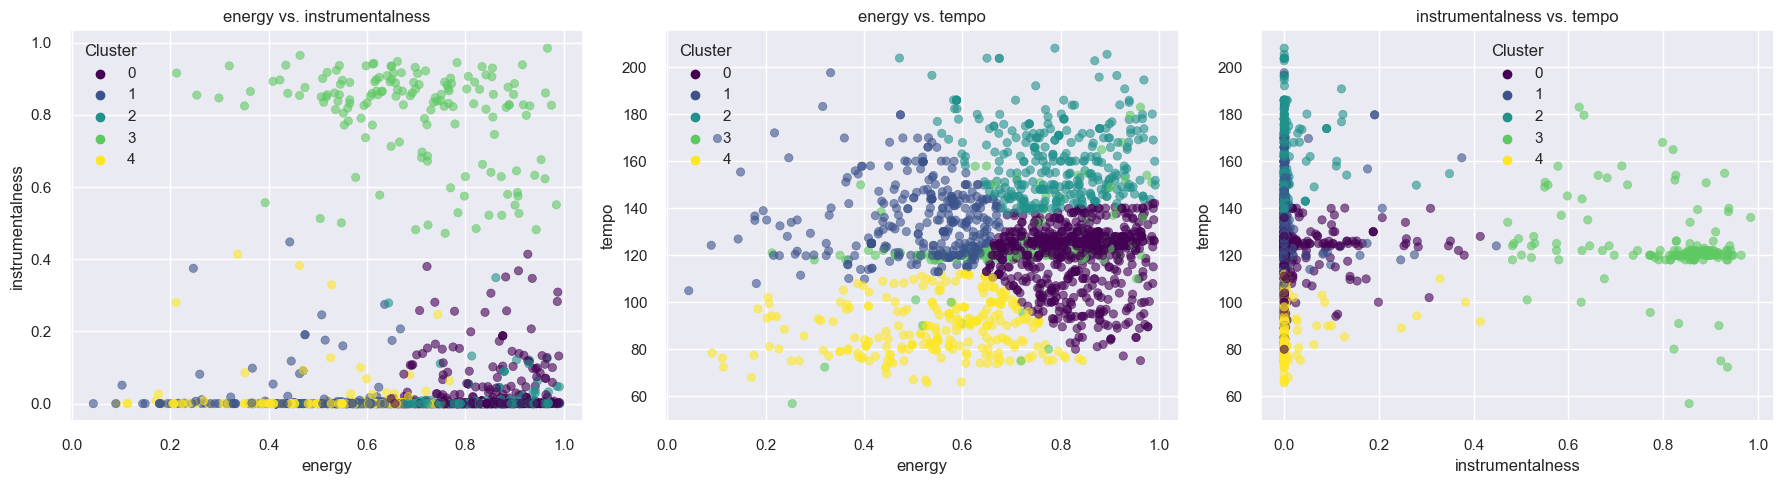

In [53]:
# TODO: Elbow method

# Define selected features

selected_features = ["energy", "instrumentalness", "tempo"]  # trying with loudness
X = track_features_clean[selected_features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply k-means clustering with k=5
kmeans = KMeans(n_clusters=5, random_state=42)
track_features_clean["cluster"] = kmeans.fit_predict(X_scaled)

# Creating pairwise scatter plots to visualize clusters
plt.figure(figsize=(18, 5))

# List of combinations for pairwise scatter plots
combinations = [("energy", "instrumentalness"), ("energy", "tempo"), ("instrumentalness", "tempo")]


for i, (x, y) in enumerate(combinations, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(data=track_features_clean, x=x, y=y, hue="cluster", palette="viridis", alpha=0.6, edgecolor=None)
    plt.title(f"{x} vs. {y}")
    plt.legend(title="Cluster")

plt.tight_layout()
plt.show()

- Here are the scatter plots visualizing the pairwise combinations of the features "energy," "instrumentalness," and "tempo." Each point represents a song, and the color indicates the cluster assigned by the k-means algorithm.

From the plots, we can observe some clear groupings:

1. In the "energy vs. instrumentalness" plot, we see distinctions based on the instrumentalness of songs and their energy levels.
2. In the "energy vs. tempo" plot, clusters appear to form mainly around tempo values.
3. The "instrumentalness vs. tempo" plot shows distinct clusters based on tempo and a separation in songs with higher instrumentalness.

### Evaluation of the clusters and assigning labels

#### Grouping the songs by cluster and calculating the mean values of the features

In [54]:
cluster_means = track_features_clean.groupby("cluster")[selected_features].mean()
cluster_means

,energy,instrumentalness,tempo
cluster,,,
0,0.827358,0.016394,119.849369
1,0.504865,0.010035,134.450459
2,0.792413,0.007461,160.092246
3,0.693513,0.803013,123.791553
4,0.556289,0.009134,89.952676


In [55]:
# Display the number of songs in each cluster
cluster_counts = track_features_clean["cluster"].value_counts()
cluster_counts

0    678
1    327
2    305
4    281
3    152
Name: cluster, dtype: int64

### Assigning labels to the clusters

0. Cluster number 0 (violett):
- high energy and tempo 
This cluster is probably the most suitable for our **sprint** group. 

1. Cluster number 1 (blue): 
- Instrumentalness: Highest 
- Energy: relatively moderate to high
- Tempo: this cluster interestingly has the most of its songs around 120 bpm, which is the average tempo of the Running songs.
This cluster is probably the most suitable for our **moderate running** group.

2. Cluster number 2 (blueish green):
- lowest tempo and energy a liitle above average
Probably suitable for **lazy** running

3. Cluster number 3 (light green):
- average tempo and average energy values 
Probably suitable for **jogging**

4. Cluster number 4 (yellow):
- highest energy but moderate tempo
Probably best suitable for **fast running**

1. **Silhouette Score**:


#### Matching new songs to the particular group of songs based on their audio features 

1. Extract its "energy," "instrumentalness," and "tempo" features.
2. Standardize these features using the scaler we defined earlier.
3. Use the fitted k-means model to predict the cluster for this song.
- This approach will place the new song in one of the 5 groups based on its features, aligning it with the intensity of running suitable for the song.

### Let's try visualize the clusters in 3D

1. Using 3D scatter plot from matplotlib
2. Using plotly for interactive 3D visualization
- giving us the ability to rotate the plot and zoom in and out and hover over the points to see the particular song's values

c:\Users\dimit\anaconda3\envs\Jupyter\lib\site-packages\matplotlib\collections.py:1080: UserWarning:

Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.



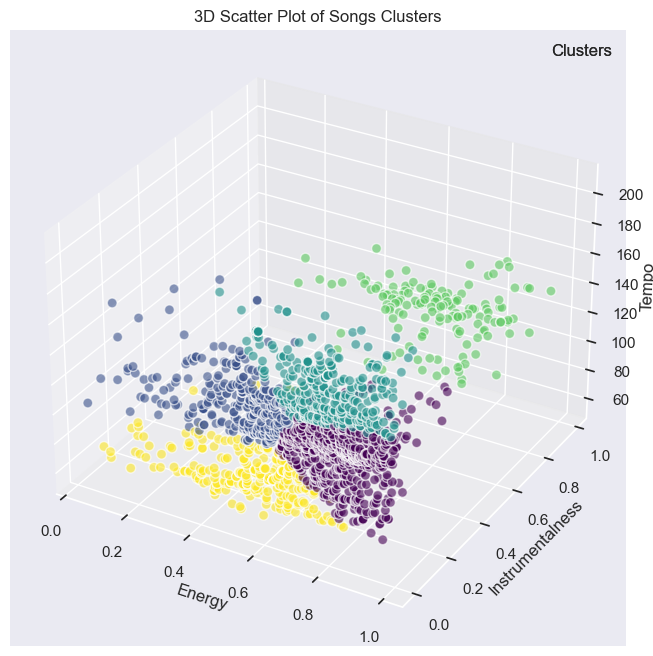

In [56]:
from mpl_toolkits.mplot3d import Axes3D

# Set up a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

# Colors for clusters
colors = plt.cm.viridis(track_features_clean["cluster"] / 4.0)

# Scatter plot
scatter = ax.scatter(
    track_features_clean["energy"],
    track_features_clean["instrumentalness"],
    track_features_clean["tempo"],
    c=colors,
    s=50,
    alpha=0.6,
    edgecolor="w",
)

# Setting labels and title
ax.set_xlabel("Energy")
ax.set_ylabel("Instrumentalness")
ax.set_zlabel("Tempo")
ax.set_title("3D Scatter Plot of Songs Clusters")

# Legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

Getting the same color palette as in the 2D plots (seaborn viridis palette)


In [57]:
num_clusters = 5
# Fetch the viridis colors from Seaborn
colors_seaborn = sns.color_palette("viridis", n_colors=num_clusters)

# Convert the colors to hex format
colors_hex = [matplotlib.colors.to_hex(c) for c in colors_seaborn]

# Create a dictionary mapping clusters to colors
color_map_seaborn = {i: color for i, color in enumerate(colors_hex)}


In [58]:
# Create the 3D scatter plot
fig = px.scatter_3d(
    track_features_clean,
    x="energy",
    y="instrumentalness",
    z="tempo",
    color="cluster",
    labels={"energy": "Energy", "instrumentalness": "Instrumentalness", "tempo": "Tempo"},
    title="3D Scatter Plot of Songs Clusters",
    opacity=0.6,
    color_discrete_map=color_map_seaborn,
)

# Adjust the figure size
fig.update_layout(width=1000, height=800)  # You can modify these values as needed
fig.show()